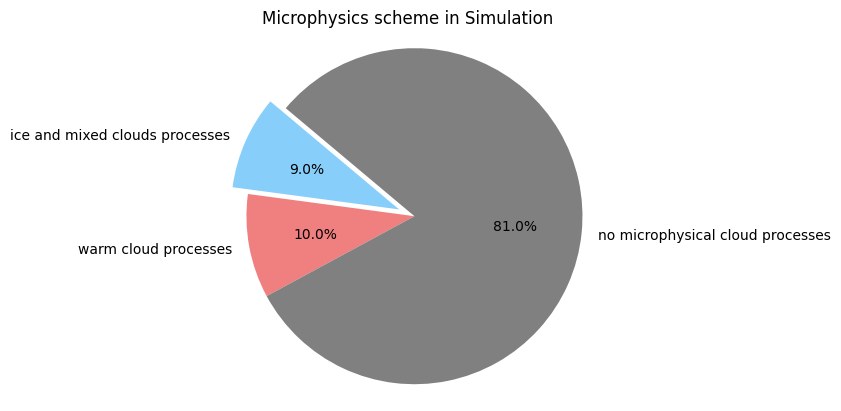

In [8]:
import matplotlib.pyplot as plt

# Data to plot
labels =  'ice and mixed clouds processes', 'warm cloud processes', 'no microphysical cloud processes'
sizes = [9, 19-9,81]
colors = ['lightskyblue', 'lightcoral', 'grey']
explode = (0.1, 0, 0)  # explode 1st slice (i.e. 'Frogs')

# Plotting the pie chart
plt.pie(sizes, labels=labels, explode=explode,colors=colors,
autopct='%1.1f%%', startangle=140)

# Equal aspect ratio ensures that pie is drawn as a circle.
plt.axis('equal')

# Adding a title
plt.title('Microphysics scheme in Simulation')

# Display the chart
plt.show()

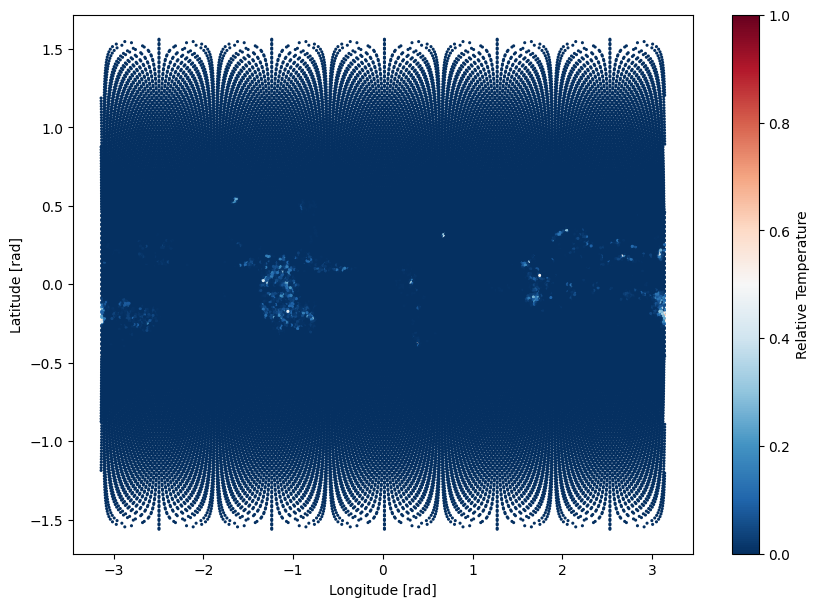

In [3]:
import matplotlib.pyplot as plt
from matplotlib import colormaps as cmps
import xarray as xr
import numpy as np

# Open file
filename = '/path/to/data/r2b9_amip_atm_mig_inputs_ml_20200207T000000Z_R02B05.nc'
file = xr.open_dataset(filename)

# Get data
clon = file['clon']
clat = file['clat']
temp = file.sel(height=44)['qi_mig'].to_numpy()

# Normalize temperature
temp = (temp - np.min(temp))/(np.max(temp) - np.min(temp))

# Plot
plt.figure(figsize=(10,7))
ax = plt.gca()
cmap = cmps['RdBu_r']
sc = ax.scatter(clon, clat, c=cmap(temp)[0], s=1.5)
sm = plt.cm.ScalarMappable(cmap=cmap)
sm.set_clim(vmin=0, vmax=1)
ax.set_xlabel('Longitude [rad]')
ax.set_ylabel('Latitude [rad]')
plt.colorbar(sm, ax=ax, label='Relative Temperature')

Shape of clon: (360,)
Shape of clat: (180,)
Shape of temp: (180, 360)


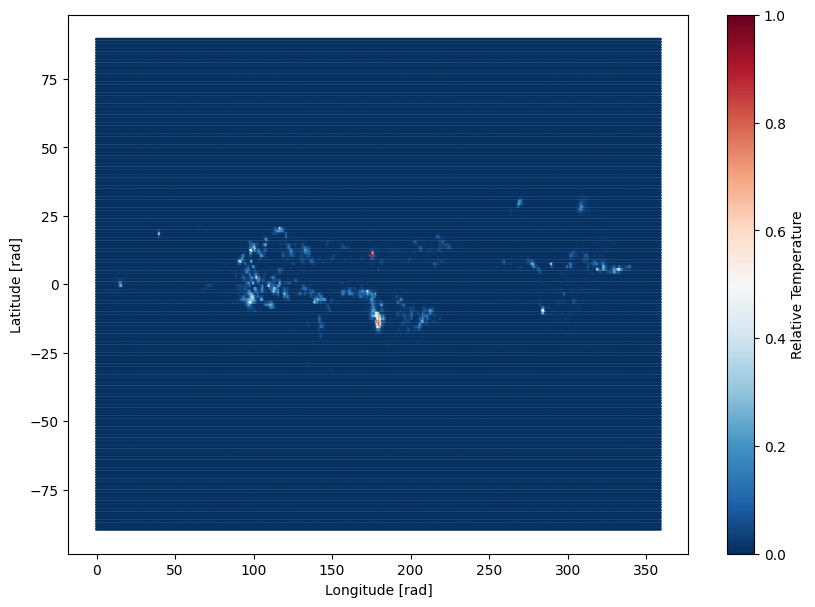

In [6]:
import matplotlib.pyplot as plt
from matplotlib import colormaps as cmps
import xarray as xr
import numpy as np

# Open file
filename = 'path/to/data/qi_mig_lonlat.nc'
file = xr.open_dataset(filename)

# Get data
clon = file['lon'].values
clat = file['lat'].values
temp = file.sel(height=44)['qi_mig'].values

# Remove the extra dimension if it exists
if temp.ndim == 3:
    temp = temp.squeeze()  # Removes single-dimensional entries from the shape

# Verify shapes
print("Shape of clon:", clon.shape)
print("Shape of clat:", clat.shape)
print("Shape of temp:", temp.shape)

# Create a meshgrid for clon and clat
clon_2d, clat_2d = np.meshgrid(clon, clat)

# Normalize temperature
temp = (temp - np.min(temp)) / (np.max(temp) - np.min(temp))

# Ensure temp is reshaped correctly
if temp.shape != clon_2d.shape:
    raise ValueError(f"Shape of temp {temp.shape} does not match shape of meshgrid {clon_2d.shape}")

# Plot
plt.figure(figsize=(10, 7))
ax = plt.gca()
cmap = cmps['RdBu_r']
sc = ax.scatter(clon_2d, clat_2d, c=temp.flatten(), cmap=cmap, s=1.5)  # Flatten temp for scatter plot
sm = plt.cm.ScalarMappable(cmap=cmap, norm=plt.Normalize(vmin=0, vmax=1))
sm.set_clim(vmin=0, vmax=1)
ax.set_xlabel('Longitude [rad]')
ax.set_ylabel('Latitude [rad]')
plt.colorbar(sm, ax=ax, label='Relative Temperature')
plt.show()


(360,) and (180,)


(90.0, 40.0)

<Figure size 1200x600 with 0 Axes>

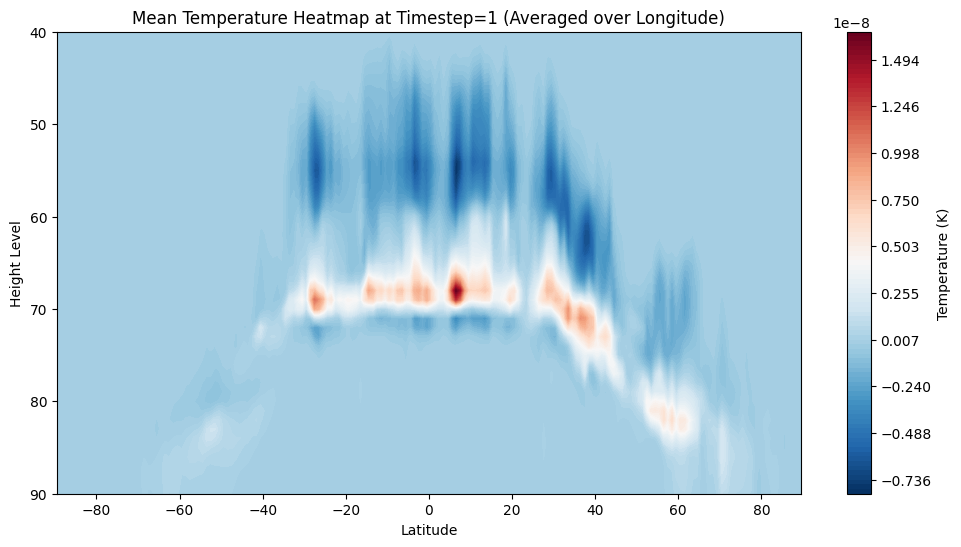

In [7]:
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import xarray as xr
import numpy as np
from IPython import display 
import argparse

filename = 'path/to/data/tend_qg_mig_lonlat.nc'
file = xr.open_dataset(filename)
#timestep = 1
clon = file['lon'].values
clat = file['lat'].values
height = file['height'].values
temp = file["tend_qg_mig"].isel(time=0).mean(dim="lon").values  # Calculate mean along clon axis for timestep=1

# Calculate mean along clon axis for timestep=1
print(f"{clon.shape} and {clat.shape}")
# Plotting
plt.figure(figsize=(12, 6))

# Adjusting for appropriate x and y based on the shapes
fig,ax = plt.subplots(figsize=(12, 6))
min_level = np.min(temp)
max_level = np.max(temp)
levels = np.linspace(min_level, max_level, 100)
latitudes = np.linspace(clat.min(), clat.max(), temp.shape[0])  # Creating a lat array if necessary
heights = height  # Assuming height is correctly aligned

plt.contourf(clat, height, temp, cmap='RdBu_r', levels=levels, vmin=min_level, vmax=max_level)
plt.colorbar(label='Temperature (K)')
plt.xlabel('Latitude')
plt.ylabel('Height Level')
plt.title('Mean Temperature Heatmap at Timestep=1 (Averaged over Longitude)')
plt.ylim(max(height), min(height))